<a href="https://colab.research.google.com/github/sivakami-k/sivakami-/blob/main/Traindelay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/flight_delays_train.csv')
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [40]:
df.isna().sum()

,0
Month,0
DayofMonth,0
DayOfWeek,0
DepTime,0
UniqueCarrier,0
Origin,0
Dest,0
Distance,0
dep_delayed_15min,0


In [41]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
x=df.iloc[:,:-1]
y=df.iloc[:,-1].values
x


,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732
1,c-4,c-20,c-3,1548,US,PIT,MCO,834
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423
...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140


In [42]:
y


array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

In [43]:
lb=LabelEncoder()
outcome=lb.fit_transform(y)
y=outcome
y

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
df = pd.DataFrame(x)
x


# Encode multiple columns
columns_to_encode = ['Month',	'DayofMonth',	'DayOfWeek',	'DepTime',	'UniqueCarrier',	'Origin',	'Dest',	'Distance']
for column in columns_to_encode:
    df[column + '_encoded'] = lb.fit_transform(df[column])

print(df)

      Month DayofMonth DayOfWeek  DepTime UniqueCarrier Origin Dest  Distance  \
0       c-8       c-21       c-7     1934            AA    ATL  DFW       732   
1       c-4       c-20       c-3     1548            US    PIT  MCO       834   
2       c-9        c-2       c-5     1422            XE    RDU  CLE       416   
3      c-11       c-25       c-6     1015            OO    DEN  MEM       872   
4      c-10        c-7       c-6     1828            WN    MDW  OMA       423   
...     ...        ...       ...      ...           ...    ...  ...       ...   
99995   c-5        c-4       c-3     1618            OO    SFO  RDD       199   
99996   c-1       c-18       c-3      804            CO    EWR  DAB       884   
99997   c-1       c-24       c-2     1901            NW    DTW  IAH      1076   
99998   c-4       c-27       c-4     1515            MQ    DFW  GGG       140   
99999  c-11       c-17       c-4     1800            WN    SEA  SMF       605   

       Month_encoded  Dayof

In [45]:
x=df
x


,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,Month_encoded,DayofMonth_encoded,DayOfWeek_encoded,DepTime_encoded,UniqueCarrier_encoded,Origin_encoded,Dest_encoded,Distance_encoded
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,10,13,6,1017,0,18,78,577
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,6,12,2,791,18,217,171,651
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,11,11,4,705,20,228,59,306
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,2,17,5,458,15,78,175,683
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,1,28,5,951,19,174,199,313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,7,25,2,821,15,246,224,106
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,0,9,2,327,4,92,72,691
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,0,16,1,984,13,85,131,828
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,6,19,3,758,12,79,107,55


In [46]:
x = x.drop(x.columns[[0,1, 2,3,4,5,6,7]], axis=1)
x

,Month_encoded,DayofMonth_encoded,DayOfWeek_encoded,DepTime_encoded,UniqueCarrier_encoded,Origin_encoded,Dest_encoded,Distance_encoded
0,10,13,6,1017,0,18,78,577
1,6,12,2,791,18,217,171,651
2,11,11,4,705,20,228,59,306
3,2,17,5,458,15,78,175,683
4,1,28,5,951,19,174,199,313
...,...,...,...,...,...,...,...,...
99995,7,25,2,821,15,246,224,106
99996,0,9,2,327,4,92,72,691
99997,0,16,1,984,13,85,131,828
99998,6,19,3,758,12,79,107,55


In [47]:

ms=MinMaxScaler(feature_range=(0,1))
x=ms.fit_transform(x)

x= pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7
0,0.909091,0.433333,1.000000,0.782910,0.000000,0.062500,0.270833,0.440794
1,0.545455,0.400000,0.333333,0.608930,0.857143,0.753472,0.593750,0.497326
2,1.000000,0.366667,0.666667,0.542725,0.952381,0.791667,0.204861,0.233766
3,0.181818,0.566667,0.833333,0.352579,0.714286,0.270833,0.607639,0.521772
4,0.090909,0.933333,0.833333,0.732102,0.904762,0.604167,0.690972,0.239114
...,...,...,...,...,...,...,...,...
99995,0.636364,0.833333,0.333333,0.632025,0.714286,0.854167,0.777778,0.080978
99996,0.000000,0.300000,0.333333,0.251732,0.190476,0.319444,0.250000,0.527884
99997,0.000000,0.533333,0.166667,0.757506,0.619048,0.295139,0.454861,0.632544
99998,0.545455,0.633333,0.500000,0.583526,0.571429,0.274306,0.371528,0.042017


In [48]:
from sklearn.model_selection import train_test_split
from  sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
# df2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/flight_delays_test.csv')
# df2



In [20]:
df2.isna().sum()

,0
Month,0
DayofMonth,0
DayOfWeek,0
DepTime,0
UniqueCarrier,0
Origin,0
Dest,0
Distance,0


In [14]:
# x1=df2.iloc[:,:-1]
# y1=df2.iloc[:,-1].values
# x1

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest
0,c-7,c-25,c-3,615,YV,MRY,PHX
1,c-4,c-17,c-2,739,WN,LAS,HOU
2,c-12,c-2,c-7,651,MQ,GSP,ORD
3,c-3,c-25,c-7,1614,WN,BWI,MHT
4,c-6,c-6,c-3,1505,UA,ORD,STL
...,...,...,...,...,...,...,...
99995,c-6,c-5,c-2,852,WN,CRP,HOU
99996,c-11,c-24,c-6,1446,UA,ORD,LAS
99997,c-1,c-30,c-2,1509,OO,ORD,SGF
99998,c-1,c-5,c-5,804,DL,LGA,ATL


In [17]:
# y1

array([456, 930, 438, ..., 322, 600, 193])

In [18]:
# lb=LabelEncoder()
# outcome1=lb.fit_transform(y1)
# y1=outcome1
# y1

array([456, 930, 438, ..., 322, 600, 193])

In [22]:
# df = pd.DataFrame(df2)
# df


# # Encode multiple columns
# columns_to_encode = ['Month',	'DayofMonth',	'DayOfWeek',	'DepTime',	'UniqueCarrier',	'Origin',	'Dest']
# for column in columns_to_encode:
#     df[column + '_encoded'] = lb.fit_transform(df[column])

# print(df)

      Month DayofMonth DayOfWeek  DepTime UniqueCarrier Origin Dest  Distance  \
0       c-7       c-25       c-3      615            YV    MRY  PHX       598   
1       c-4       c-17       c-2      739            WN    LAS  HOU      1235   
2      c-12        c-2       c-7      651            MQ    GSP  ORD       577   
3       c-3       c-25       c-7     1614            WN    BWI  MHT       377   
4       c-6        c-6       c-3     1505            UA    ORD  STL       258   
...     ...        ...       ...      ...           ...    ...  ...       ...   
99995   c-6        c-5       c-2      852            WN    CRP  HOU       187   
99996  c-11       c-24       c-6     1446            UA    ORD  LAS      1515   
99997   c-1       c-30       c-2     1509            OO    ORD  SGF       438   
99998   c-1        c-5       c-5      804            DL    LGA  ATL       761   
99999  c-10       c-29       c-1      834            OO    MKE  MSP       297   

       Month_encoded  Dayof

In [23]:
# x1=df
# x1

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,Month_encoded,DayofMonth_encoded,DayOfWeek_encoded,DepTime_encoded,UniqueCarrier_encoded,Origin_encoded,Dest_encoded
0,c-7,c-25,c-3,615,YV,MRY,PHX,598,9,17,2,221,19,194,217
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235,6,8,1,305,17,155,129
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577,3,11,6,257,11,121,208
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377,5,17,6,820,17,49,183
4,c-6,c-6,c-3,1505,UA,ORD,STL,258,8,27,2,751,15,209,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,c-6,c-5,c-2,852,WN,CRP,HOU,187,8,26,1,378,17,70,129
99996,c-11,c-24,c-6,1446,UA,ORD,LAS,1515,2,16,5,732,15,209,154
99997,c-1,c-30,c-2,1509,OO,ORD,SGF,438,0,23,1,755,14,209,254
99998,c-1,c-5,c-5,804,DL,LGA,ATL,761,0,26,4,330,6,162,19


In [24]:
# x1 = x1.drop(x1.columns[[0,1, 2,3,4,5,6]], axis=1)
# x1

,Distance,Month_encoded,DayofMonth_encoded,DayOfWeek_encoded,DepTime_encoded,UniqueCarrier_encoded,Origin_encoded,Dest_encoded
0,598,9,17,2,221,19,194,217
1,1235,6,8,1,305,17,155,129
2,577,3,11,6,257,11,121,208
3,377,5,17,6,820,17,49,183
4,258,8,27,2,751,15,209,270
...,...,...,...,...,...,...,...,...
99995,187,8,26,1,378,17,70,129
99996,1515,2,16,5,732,15,209,154
99997,438,0,23,1,755,14,209,254
99998,761,0,26,4,330,6,162,19


In [25]:

# ms=MinMaxScaler(feature_range=(0,1))
# x1=ms.fit_transform(x1)

# x1= pd.DataFrame(x1)
# x1

,0,1,2,3,4,5,6,7
0,0.114987,0.818182,0.566667,0.333333,0.171851,1.000000,0.648829,0.730640
1,0.244170,0.545455,0.266667,0.166667,0.237170,0.894737,0.518395,0.434343
2,0.110728,0.272727,0.366667,1.000000,0.199844,0.578947,0.404682,0.700337
3,0.070168,0.454545,0.566667,1.000000,0.637636,0.894737,0.163880,0.616162
4,0.046035,0.727273,0.900000,0.333333,0.583981,0.789474,0.698997,0.909091
...,...,...,...,...,...,...,...,...
99995,0.031637,0.727273,0.866667,0.166667,0.293935,0.894737,0.234114,0.434343
99996,0.300953,0.181818,0.533333,0.833333,0.569207,0.789474,0.698997,0.518519
99997,0.082539,0.000000,0.766667,0.166667,0.587092,0.736842,0.698997,0.855219
99998,0.148043,0.000000,0.866667,0.666667,0.256610,0.315789,0.541806,0.063973


In [71]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)
# lr=LogisticRegression()
# lr.fit(xtrain,ytrain)
# ypred=lr.predict(xtest)
# print(ypred)
# print(accuracy_score(ytest,ypred))

[0 0 0 ... 0 0 0]
0.8089333333333333


In [73]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain,ytrain)
ypred=nb.predict(xtest)
print(ypred)
print(accuracy_score(ytest,ypred))

[0 0 0 ... 0 0 0]
0.8089666666666666


In [74]:
cn=confusion_matrix(ytest,ypred)
cn

array([[24269,     0],
       [ 5731,     0]])

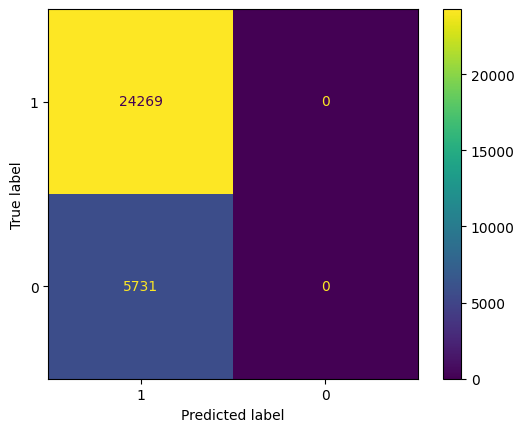

In [75]:
out=[1,0]
cn_dis=ConfusionMatrixDisplay(cn,display_labels=out)
cn_dis.plot()

In [76]:
import joblib


joblib.dump(nb, '/content/drive/MyDrive/Colab Notebooks/dataset/TrainPredLogModel.pkl')

['/content/drive/MyDrive/Colab Notebooks/dataset/TrainPredLogModel.pkl']

In [56]:
df




,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,Month_encoded,DayofMonth_encoded,DayOfWeek_encoded,DepTime_encoded,UniqueCarrier_encoded,Origin_encoded,Dest_encoded,Distance_encoded
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,10,13,6,1017,0,18,78,577
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,6,12,2,791,18,217,171,651
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,11,11,4,705,20,228,59,306
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,2,17,5,458,15,78,175,683
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,1,28,5,951,19,174,199,313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,7,25,2,821,15,246,224,106
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,0,9,2,327,4,92,72,691
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,0,16,1,984,13,85,131,828
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,6,19,3,758,12,79,107,55


In [78]:
import joblib


nb = joblib.load('/content/drive/MyDrive/Colab Notebooks/dataset/TrainPredLogModel.pkl')
# 10	13	6	1017	0	18	78	732


In [88]:
month = int(input("Enter month: "))
day = int(input("Enter dayofmonth : "))
week = int(input("Enter dayofweek: "))
time = int(input("Enter time: "))
carrier = int(input("Enter Uniquecarrier: "))
origin = int(input("Enter origin: "))
dest = int(input("Enter destination: "))
distance = int(input("Enter distance: "))

# Month	DayofMonth	DayOfWeek	DepTime	UniqueCarrier	Origin	Dest	Distance	dep_delayed_15min

Enter month: 10
Enter dayofmonth : 13
Enter dayofweek: 6
Enter time: 1017
Enter Uniquecarrier: 0
Enter origin: 18
Enter destination: 78
Enter distance: 732


In [89]:
model_selection=nb.predict([[month,day,week,time,carrier,origin,dest,distance]])
model_selection

array([0])

In [91]:
if model_selection==1:
  print("Delayed")
else:
  print("Not delayed")

Not delayed
